In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # [10 Minutes to pandas](http://pandas-docs.github.io/pandas-docs-travis/getting_started/10min.html)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['Solarize_Light2']) # customising plot styles
# customise facecolor of figures
plt.rcParams['figure.facecolor']='#FDF6E3' # inline output
plt.rcParams['savefig.facecolor']='#FDF6E3' # pdf


 ## Object creation

In [2]:
# creating a Series by passing a list of values, letting pandas create a default integer index
s=pd.Series([1,3,5,np.nan,6,8])
s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# creating a DataFrame by passing a NumPy array, with a datetime index and labelled columns
dates=pd.date_range('20130101',periods=6)
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df


,A,B,C,D
2013-01-01,0.517620,-0.846561,1.040024,2.931026
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594
2013-01-04,0.402756,0.622148,-0.531312,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603
2013-01-06,-0.504444,1.783727,0.836525,-1.431898


In [5]:
# creating a DataFrame by passing a dict of objects that can be converted to series-like
df2=pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D':np.array([3]*4,dtype='int32'),
                    'E':pd.Categorical(["test","train","test","train"]),
                    'F':'foo'})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# the columns of the resulting DataFrame have different dtypes
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

 ## Viewing data

In [7]:
# view the top and bottom rows of the frame
df.head()


,A,B,C,D
2013-01-01,0.517620,-0.846561,1.040024,2.931026
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594
2013-01-04,0.402756,0.622148,-0.531312,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603


In [8]:
df.tail(3)


,A,B,C,D
2013-01-04,0.402756,0.622148,-0.531312,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603
2013-01-06,-0.504444,1.783727,0.836525,-1.431898


In [9]:
# display the index and columns
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

 `DataFrame.to_numpy()` gives a NumPy representation of the underlying data. This can be an expensive operation when your `DataFrame` has columns with different data types because NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

In [11]:
# for df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn't require copying data
df.to_numpy()


array([[ 0.51761986, -0.84656149,  1.04002366,  2.93102561],
       [ 0.07625854,  0.10221067, -0.69429002,  0.9012955 ],
       [ 1.117656  ,  2.0323602 , -2.0411544 , -0.27159421],
       [ 0.40275552,  0.62214805, -0.53131154,  0.15970539],
       [ 0.23187607,  1.68507127,  0.87741103,  1.13160277],
       [-0.50444395,  1.78372734,  0.83652479, -1.4318976 ]])

In [12]:
# for df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive
df2.to_numpy()


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# describe() shows a quick statistic summary of your data
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.306954,0.896493,-0.085466,0.570023
std,0.534419,1.135220,1.219679,1.475386
min,-0.504444,-0.846561,-2.041154,-1.431898
25%,0.115163,0.232195,-0.653545,-0.163769
50%,0.317316,1.153610,0.152607,0.530500
75%,0.488904,1.759063,0.867189,1.074026
max,1.117656,2.032360,1.040024,2.931026


In [14]:
# transposing your data
df.T


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.517620,0.076259,1.117656,0.402756,0.231876,-0.504444
B,-0.846561,0.102211,2.032360,0.622148,1.685071,1.783727
C,1.040024,-0.694290,-2.041154,-0.531312,0.877411,0.836525
D,2.931026,0.901296,-0.271594,0.159705,1.131603,-1.431898


In [15]:
# sorting by an axis
df.sort_index(axis=1,ascending=False)


,D,C,B,A
2013-01-01,2.931026,1.040024,-0.846561,0.517620
2013-01-02,0.901296,-0.694290,0.102211,0.076259
2013-01-03,-0.271594,-2.041154,2.032360,1.117656
2013-01-04,0.159705,-0.531312,0.622148,0.402756
2013-01-05,1.131603,0.877411,1.685071,0.231876
2013-01-06,-1.431898,0.836525,1.783727,-0.504444


In [16]:
# sorting by values
df.sort_values(by='B')


,A,B,C,D
2013-01-01,0.517620,-0.846561,1.040024,2.931026
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-04,0.402756,0.622148,-0.531312,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603
2013-01-06,-0.504444,1.783727,0.836525,-1.431898
2013-01-03,1.117656,2.032360,-2.041154,-0.271594


 ## Selection

 ### Getting

In [17]:
# selecting a single column, which yields a Series, equivalent to df.A
df['A']


2013-01-01    0.517620
2013-01-02    0.076259
2013-01-03    1.117656
2013-01-04    0.402756
2013-01-05    0.231876
2013-01-06   -0.504444
Freq: D, Name: A, dtype: float64

In [18]:
# selecting via [], which slices the rows
df[0:3]


,A,B,C,D
2013-01-01,0.517620,-0.846561,1.040024,2.931026
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594


In [19]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594
2013-01-04,0.402756,0.622148,-0.531312,0.159705


 ### Selection by label

In [20]:
# getting a cross section using a label
df.loc[dates[0]]


A    0.517620
B   -0.846561
C    1.040024
D    2.931026
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# selecting on a multi-axis by label
df.loc[:,['A','B']]


,A,B
2013-01-01,0.517620,-0.846561
2013-01-02,0.076259,0.102211
2013-01-03,1.117656,2.032360
2013-01-04,0.402756,0.622148
2013-01-05,0.231876,1.685071
2013-01-06,-0.504444,1.783727


In [22]:
# showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]


,A,B
2013-01-02,0.076259,0.102211
2013-01-03,1.117656,2.032360
2013-01-04,0.402756,0.622148


In [23]:
# reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]


A    0.076259
B    0.102211
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
# getting a scalar value
df.loc[dates[0],'A']


0.5176198565112256

In [25]:
# getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0],'A']


0.5176198565112256

 ### Selection by position

In [26]:
# select via the position of the passed integers
df.iloc[3]


A    0.402756
B    0.622148
C   -0.531312
D    0.159705
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# by integer slices, acting similar to numpy/python
df.iloc[3:5,0:2]


,A,B
2013-01-04,0.402756,0.622148
2013-01-05,0.231876,1.685071


In [28]:
# by lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]


,A,C
2013-01-02,0.076259,-0.694290
2013-01-03,1.117656,-2.041154
2013-01-05,0.231876,0.877411


In [29]:
# slicing rows explicitly
df.iloc[1:3,:]


,A,B,C,D
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594


In [30]:
# slicing columns explicitly
df.iloc[:,1:3]


,B,C
2013-01-01,-0.846561,1.040024
2013-01-02,0.102211,-0.694290
2013-01-03,2.032360,-2.041154
2013-01-04,0.622148,-0.531312
2013-01-05,1.685071,0.877411
2013-01-06,1.783727,0.836525


In [31]:
# getting a value explicitly
df.iloc[1,1]


0.10221067001033679

In [32]:
# getting fast access to a scalar (equivalent to the prior method)
df.iat[1,1]


0.10221067001033679

 ### Boolean indexing

In [33]:
# using a single column’s values to select data
df[df.A>0]


,A,B,C,D
2013-01-01,0.517620,-0.846561,1.040024,2.931026
2013-01-02,0.076259,0.102211,-0.694290,0.901296
2013-01-03,1.117656,2.032360,-2.041154,-0.271594
2013-01-04,0.402756,0.622148,-0.531312,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603


In [34]:
# selecting values from a DataFrame where a boolean condition is met
df[df>0]


,A,B,C,D
2013-01-01,0.517620,NaN,1.040024,2.931026
2013-01-02,0.076259,0.102211,NaN,0.901296
2013-01-03,1.117656,2.032360,NaN,NaN
2013-01-04,0.402756,0.622148,NaN,0.159705
2013-01-05,0.231876,1.685071,0.877411,1.131603
2013-01-06,NaN,1.783727,0.836525,NaN


In [35]:
# using the isin() method for filtering
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
df2


,A,B,C,D,E
2013-01-01,0.517620,-0.846561,1.040024,2.931026,one
2013-01-02,0.076259,0.102211,-0.694290,0.901296,one
2013-01-03,1.117656,2.032360,-2.041154,-0.271594,two
2013-01-04,0.402756,0.622148,-0.531312,0.159705,three
2013-01-05,0.231876,1.685071,0.877411,1.131603,four
2013-01-06,-0.504444,1.783727,0.836525,-1.431898,three


In [36]:
df2[df2['E'].isin(['two','four'])]


,A,B,C,D,E
2013-01-03,1.117656,2.032360,-2.041154,-0.271594,two
2013-01-05,0.231876,1.685071,0.877411,1.131603,four


 ### Setting

In [37]:
# setting a new column automatically aligns the data by the indexes
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F']=s1


In [39]:
# setting values by label
df.at[dates[0],'A']=0


In [40]:
# setting values by position
df.iat[0,1]=0


In [41]:
# setting by assigning with a NumPy array
df.loc[:,'D']=np.array([5]*len(df))


In [42]:
# result of the prior setting operations
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.040024,5,NaN
2013-01-02,0.076259,0.102211,-0.694290,5,1.0
2013-01-03,1.117656,2.032360,-2.041154,5,2.0
2013-01-04,0.402756,0.622148,-0.531312,5,3.0
2013-01-05,0.231876,1.685071,0.877411,5,4.0
2013-01-06,-0.504444,1.783727,0.836525,5,5.0


In [43]:
# a where operation with setting
df2=df.copy()
df2[df2>0]=-df2
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.040024,-5,NaN
2013-01-02,-0.076259,-0.102211,-0.694290,-5,-1.0
2013-01-03,-1.117656,-2.032360,-2.041154,-5,-2.0
2013-01-04,-0.402756,-0.622148,-0.531312,-5,-3.0
2013-01-05,-0.231876,-1.685071,-0.877411,-5,-4.0
2013-01-06,-0.504444,-1.783727,-0.836525,-5,-5.0


 ## Missing data

 pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [44]:
# reindexing to change/add/delete the index on a specific axis
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.040024,5,NaN,1.0
2013-01-02,0.076259,0.102211,-0.694290,5,1.0,1.0
2013-01-03,1.117656,2.032360,-2.041154,5,2.0,NaN
2013-01-04,0.402756,0.622148,-0.531312,5,3.0,NaN


In [45]:
# to drop any rows that have missing data
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,0.076259,0.102211,-0.69429,5,1.0,1.0


In [46]:
# filling missing data
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.040024,5,5.0,1.0
2013-01-02,0.076259,0.102211,-0.694290,5,1.0,1.0
2013-01-03,1.117656,2.032360,-2.041154,5,2.0,5.0
2013-01-04,0.402756,0.622148,-0.531312,5,3.0,5.0


In [47]:
# get the boolean mask where values are nan
pd.isna(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


 ## Operations

 ### Stats

 Operations in general exclude missing data.

In [48]:
# performing a descriptive statistic
df.mean()


A    0.220684
B    1.037586
C   -0.085466
D    5.000000
F    3.000000
dtype: float64

In [49]:
# same operation on the other axis
df.mean(1)


2013-01-01    1.510006
2013-01-02    1.096836
2013-01-03    1.621772
2013-01-04    1.698718
2013-01-05    2.358872
2013-01-06    2.423162
Freq: D, dtype: float64

In [50]:
# operating with objects that have different dimensionality and need alignment
# pandas automatically broadcasts along the specified dimension
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s,axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.117656,1.032360,-3.041154,4.0,1.0
2013-01-04,-2.597244,-2.377852,-3.531312,2.0,0.0
2013-01-05,-4.768124,-3.314929,-4.122589,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


 ### Apply

In [52]:
# applying functions to the data
df.apply(np.cumsum)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.040024,5,NaN
2013-01-02,0.076259,0.102211,0.345734,10,1.0
2013-01-03,1.193915,2.134571,-1.695421,15,3.0
2013-01-04,1.596670,2.756719,-2.226732,20,6.0
2013-01-05,1.828546,4.441790,-1.349321,25,10.0
2013-01-06,1.324102,6.225518,-0.512796,30,15.0


In [53]:
df.apply(lambda x:x.max()-x.min())


A    1.622100
B    2.032360
C    3.081178
D    0.000000
F    4.000000
dtype: float64

 ### Histogramming

In [54]:
s=pd.Series(np.random.randint(0,7,size=10))
s


0    4
1    5
2    4
3    0
4    2
5    3
6    6
7    1
8    4
9    3
dtype: int32

In [55]:
s.value_counts()


4    3
3    2
6    1
5    1
2    1
1    1
0    1
dtype: int64

 ### String methods

In [56]:
# pattern-matching in str generally uses regular expressions by default (and in some cases always uses them)
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

 ## Merge

 ### Concat

In [57]:
# concatenating pandas objects together
df=pd.DataFrame(np.random.randn(10,4))
df


,0,1,2,3
0,-0.265798,-0.228998,-0.919704,-1.066175
1,0.074443,-1.214742,1.407673,0.436498
2,1.408562,-1.078110,1.895304,1.281774
3,-0.019948,-0.332650,0.081211,0.858390
4,1.004195,0.668806,-0.249792,0.412242
5,-1.016070,0.465184,0.580257,-0.569844
6,0.705513,-1.661880,1.355900,-0.042505
7,-0.085345,0.791181,-1.390133,-1.378445
8,-0.694979,-0.948920,-0.899979,-1.376891
9,0.545945,-1.111394,0.034175,-1.176046


In [58]:
# break it into pieces
pieces=[df[:3],df[3:7],df[7:]]
pd.concat(pieces)


,0,1,2,3
0,-0.265798,-0.228998,-0.919704,-1.066175
1,0.074443,-1.214742,1.407673,0.436498
2,1.408562,-1.078110,1.895304,1.281774
3,-0.019948,-0.332650,0.081211,0.858390
4,1.004195,0.668806,-0.249792,0.412242
5,-1.016070,0.465184,0.580257,-0.569844
6,0.705513,-1.661880,1.355900,-0.042505
7,-0.085345,0.791181,-1.390133,-1.378445
8,-0.694979,-0.948920,-0.899979,-1.376891
9,0.545945,-1.111394,0.034175,-1.176046


 ### Join

In [59]:
# SQL-style merges
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})


In [60]:
left


,key,lval
0,foo,1
1,foo,2


In [61]:
right


,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left,right,on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [63]:
# another example
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})


In [64]:
left


,key,lval
0,foo,1
1,bar,2


In [65]:
right


,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left,right,on='key')


,key,lval,rval
0,foo,1,4
1,bar,2,5


 ### Append

In [67]:
# append rows to a dataframe
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df


,A,B,C,D
0,0.875895,0.051863,-0.945498,-0.749212
1,0.045242,1.126397,0.903464,-1.396918
2,0.218917,-0.980452,-2.145818,-0.021707
3,-1.603791,0.958902,0.898873,-0.370415
4,1.172627,-0.265812,0.349334,-0.421664
5,-1.147226,0.203729,1.437597,2.840168
6,0.155859,0.301999,1.609480,1.648503
7,-0.768989,0.555172,1.250675,1.546946


In [68]:
s=df.iloc[3]
df.append(s,ignore_index=True)


,A,B,C,D
0,0.875895,0.051863,-0.945498,-0.749212
1,0.045242,1.126397,0.903464,-1.396918
2,0.218917,-0.980452,-2.145818,-0.021707
3,-1.603791,0.958902,0.898873,-0.370415
4,1.172627,-0.265812,0.349334,-0.421664
5,-1.147226,0.203729,1.437597,2.840168
6,0.155859,0.301999,1.609480,1.648503
7,-0.768989,0.555172,1.250675,1.546946
8,-1.603791,0.958902,0.898873,-0.370415


 ## Grouping

 Grouping refers to a process involving one or more of the following steps:
 * **Splitting** the data into groups based on some criteria
 * **Applying** a function to each group independently
 * **Combining** the results into a data structure

In [69]:
df=pd.DataFrame({'A':['foo','bar','foo','bar',
                    'foo','bar','foo','foo'],
                    'B':['one','one','two','three',
                    'two','two','one','three'],
                    'C':np.random.randn(8),
                    'D':np.random.randn(8)})
df


,A,B,C,D
0,foo,one,0.561557,1.269170
1,bar,one,-0.254201,-1.491185
2,foo,two,-0.049181,1.681268
3,bar,three,-0.392841,0.136673
4,foo,two,-0.600733,-0.051154
5,bar,two,-0.977798,0.851408
6,foo,one,-0.635894,-1.506015
7,foo,three,-0.557684,-1.188483


In [70]:
# grouping and then applying the sum() function to the resulting groups
df.groupby('A').sum()


,C,D
A,,
bar,-1.624840,-0.503103
foo,-1.281935,0.204786


In [71]:
# grouping by multiple columns forms a hierarchical index
df.groupby(['A','B']).sum()


C         D
A   B                        
bar one   -0.254201 -1.491185
    three -0.392841  0.136673
    two   -0.977798  0.851408
foo one   -0.074337 -0.236845
    three -0.557684 -1.188483
    two   -0.649914  1.630114

 ## Reshaping

 ### Stack

In [72]:
tuples=list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                    ['one','two','one','two',
                    'one','two','one','two']]))
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2


A         B
first second                    
bar   one    -1.079832  0.211755
      two    -0.496595  0.052880
baz   one    -0.011469  0.577163
      two    -1.059948 -0.573313

In [73]:
# the stack() method "compresses" a level in the DataFrame's columns
stacked=df2.stack()
stacked


first  second   
bar    one     A   -1.079832
               B    0.211755
       two     A   -0.496595
               B    0.052880
baz    one     A   -0.011469
               B    0.577163
       two     A   -1.059948
               B   -0.573313
dtype: float64

 With a "stacked" DataFrame or Series (having a `MultiIndex` as the `index`), the last inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [74]:
stacked.unstack()


A         B
first second                    
bar   one    -1.079832  0.211755
      two    -0.496595  0.052880
baz   one    -0.011469  0.577163
      two    -1.059948 -0.573313

In [75]:
stacked.unstack(1)


second        one       two
first                      
bar   A -1.079832 -0.496595
      B  0.211755  0.052880
baz   A -0.011469 -1.059948
      B  0.577163 -0.573313

In [76]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -1.079832 -0.011469
       B  0.211755  0.577163
two    A -0.496595 -1.059948
       B  0.052880 -0.573313

 ### Pivot tables

In [77]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                    'B':['A','B','C']*4,
                    'C':['foo','foo','foo','bar','bar','bar']*2,
                    'D':np.random.randn(12),
                    'E':np.random.randn(12)})
df


,A,B,C,D,E
0,one,A,foo,0.602914,-0.150895
1,one,B,foo,1.158689,-0.130873
2,two,C,foo,0.032729,-0.750981
3,three,A,bar,-0.190062,-0.145007
4,one,B,bar,1.841364,-1.192883
5,one,C,bar,-2.447058,-0.635539
6,two,A,foo,0.597087,-0.561689
7,three,B,foo,-0.112951,-0.149243
8,one,C,foo,-0.009224,1.946495
9,one,A,bar,-0.325256,1.363857


In [78]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])


C             bar       foo
A     B                    
one   A -0.325256  0.602914
      B  1.841364  1.158689
      C -2.447058 -0.009224
three A -0.190062       NaN
      B       NaN -0.112951
      C -1.846050       NaN
two   A       NaN  0.597087
      B -0.062253       NaN
      C       NaN  0.032729

 ## Time series

 pandas has the functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data).

In [79]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()


2012-01-01    25125
Freq: 5T, dtype: int32

In [80]:
# time zone representation
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
ts


2012-03-06    0.267859
2012-03-07    1.376983
2012-03-08   -0.302174
2012-03-09    1.193939
2012-03-10   -0.153003
Freq: D, dtype: float64

In [81]:
ts_utc=ts.tz_localize('UTC')
ts_utc


2012-03-06 00:00:00+00:00    0.267859
2012-03-07 00:00:00+00:00    1.376983
2012-03-08 00:00:00+00:00   -0.302174
2012-03-09 00:00:00+00:00    1.193939
2012-03-10 00:00:00+00:00   -0.153003
Freq: D, dtype: float64

In [82]:
# converting to another time zone
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00    0.267859
2012-03-06 19:00:00-05:00    1.376983
2012-03-07 19:00:00-05:00   -0.302174
2012-03-08 19:00:00-05:00    1.193939
2012-03-09 19:00:00-05:00   -0.153003
Freq: D, dtype: float64

In [83]:
# converting between time span representation
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts


2012-01-31   -0.648138
2012-02-29    1.739698
2012-03-31    0.216088
2012-04-30   -1.507827
2012-05-31    1.654610
Freq: M, dtype: float64

In [84]:
ps=ts.to_period()
ps


2012-01   -0.648138
2012-02    1.739698
2012-03    0.216088
2012-04   -1.507827
2012-05    1.654610
Freq: M, dtype: float64

In [85]:
ps.to_timestamp()


2012-01-01   -0.648138
2012-02-01    1.739698
2012-03-01    0.216088
2012-04-01   -1.507827
2012-05-01    1.654610
Freq: MS, dtype: float64

In [86]:
# convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng=pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts=pd.Series(np.random.randn(len(prng)),prng)
ts.index=(prng.asfreq('M','e')+1).asfreq('H','s')+9
ts.head()


1990-03-01 09:00   -1.143635
1990-06-01 09:00   -0.212945
1990-09-01 09:00   -0.502209
1990-12-01 09:00   -0.636810
1991-03-01 09:00   -0.144117
Freq: H, dtype: float64

 ## Categoricals

In [87]:
# categorical data in a DataFrame
df=pd.DataFrame({"id":[1,2,3,4,5,6],
                    "raw_grade": ['a','b','b','a','a','e']})
# convert the raw grades to a categorical data type
df["grade"]=df["raw_grade"].astype("category")
df["grade"]


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [88]:
# rename the categories to more meaningful names
df["grade"].cat.categories=["very good","good","very bad"]
# reorder the categories and simultaneously add the missing categories 
# methods under Series.cat return a new Series by default
df["grade"]=df["grade"].cat.set_categories(["very bad","bad","medium",
                                            "good","very good"])
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [89]:
# sorting is per order in the categories, not lexical order
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [90]:
# grouping by a categorical column also shows empty categories
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

 ## Plotting

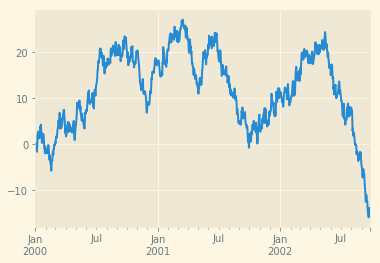

In [91]:
ts=pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()
plt.savefig('pandas/ts_plot.pdf') # save plot as pdf


<Figure size 432x288 with 0 Axes>

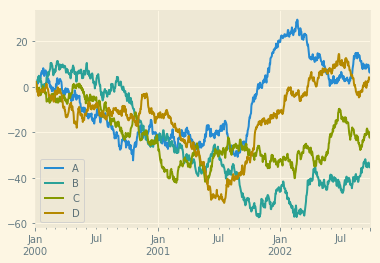

In [92]:
# on a DataFrame, the plot() method is a convenience to plot all of the columns with labels
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,
                    columns=['A','B','C','D'])
df=df.cumsum()
plt.figure()
df.plot()
# set legend in best location; change legend text colour to match that of the axes
plt.setp(plt.legend(loc='best').get_texts(),color='#586e75')
plt.savefig('pandas/df_plot.pdf') # save plot as pdf


 ## Getting data in / out

 ### CSV

In [93]:
# writing to a csv file
df.to_csv('pandas/foo.csv')
# reading from a csv file
pd.read_csv('pandas/foo.csv')


,Unnamed: 0,A,B,C,D
0,2000-01-01,1.487130,1.084688,0.245337,0.211235
1,2000-01-02,0.967020,1.212113,-0.075903,1.066864
2,2000-01-03,1.189750,0.649406,-0.477967,2.221337
3,2000-01-04,1.151768,1.002834,-1.089134,0.784800
4,2000-01-05,1.309083,1.708831,0.298758,1.099479
5,2000-01-06,0.973051,1.328634,0.218738,0.457015
6,2000-01-07,1.845772,2.649018,-0.424813,-1.572784
7,2000-01-08,2.209405,3.187453,-1.402862,-2.470569
8,2000-01-09,1.341543,3.208832,-1.394497,-2.079237
9,2000-01-10,2.361227,4.311452,-1.988209,-3.416189


 ### HDF5

In [94]:
# writing to a HDF5 Store
df.to_hdf('pandas/foo.h5', 'df')
# reading from a HDF5 Store
pd.read_hdf('pandas/foo.h5', 'df')


,A,B,C,D
2000-01-01,1.487130,1.084688,0.245337,0.211235
2000-01-02,0.967020,1.212113,-0.075903,1.066864
2000-01-03,1.189750,0.649406,-0.477967,2.221337
2000-01-04,1.151768,1.002834,-1.089134,0.784800
2000-01-05,1.309083,1.708831,0.298758,1.099479
2000-01-06,0.973051,1.328634,0.218738,0.457015
2000-01-07,1.845772,2.649018,-0.424813,-1.572784
2000-01-08,2.209405,3.187453,-1.402862,-2.470569
2000-01-09,1.341543,3.208832,-1.394497,-2.079237
2000-01-10,2.361227,4.311452,-1.988209,-3.416189


 ### Excel

In [95]:
# writing to an excel file
df.to_excel('pandas/foo.xlsx',sheet_name='Sheet1')
# reading from an excel file
pd.read_excel('pandas/foo.xlsx','Sheet1',index_col=None,na_values=['NA'])


,Unnamed: 0,A,B,C,D
0,2000-01-01,1.487130,1.084688,0.245337,0.211235
1,2000-01-02,0.967020,1.212113,-0.075903,1.066864
2,2000-01-03,1.189750,0.649406,-0.477967,2.221337
3,2000-01-04,1.151768,1.002834,-1.089134,0.784800
4,2000-01-05,1.309083,1.708831,0.298758,1.099479
5,2000-01-06,0.973051,1.328634,0.218738,0.457015
6,2000-01-07,1.845772,2.649018,-0.424813,-1.572784
7,2000-01-08,2.209405,3.187453,-1.402862,-2.470569
8,2000-01-09,1.341543,3.208832,-1.394497,-2.079237
9,2000-01-10,2.361227,4.311452,-1.988209,-3.416189


 ## Gotchas
 If you are attempting to perform an operation you might see an exception like:
 ```python
 >>> if pd.Series([False, True, False]):
 ...     print("I was true")
 Traceback
    ...
 ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
 ```